In [1]:
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from cramersche import *

In [2]:
matrix_size_det_test = 11 ## Matrixgröße (type), Matzrix wird aber für den Typ -1 generiert

### Funktion zum berechen des Typs der Matrix und checken ob es sich um eine quadratische Matrix handelt

### Plotten der Zeit in Abhängigkeit der Anzahl der Elemente für die Berechnung der Determinante

#### Generieung von Testdaten

In [ ]:
def gen_test():
    data = []
    for i in range(1, matrix_size_det_test+1):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        start = timer()
        calc_determinant(matrix)
        end = timer()
        time = end - start
        data.append([i*i, time])
    return data

In [12]:
data = gen_test()
for i in range(10):
    new_data = gen_test()
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 11
print(data)
data_det = data

[[1, 8.296364368024197e-07], [4, 5.416355138136582e-07], [9, 4.060636539096859e-06], [16, 1.534827540374615e-05], [25, 7.774981680664827e-05], [36, 0.0004745152718070048], [49, 0.003332382544282485], [64, 0.02565995108902412], [81, 0.2250360643639314], [100, 2.232518499907614], [121, 24.699270416633226]]


#### Plotten der Daten

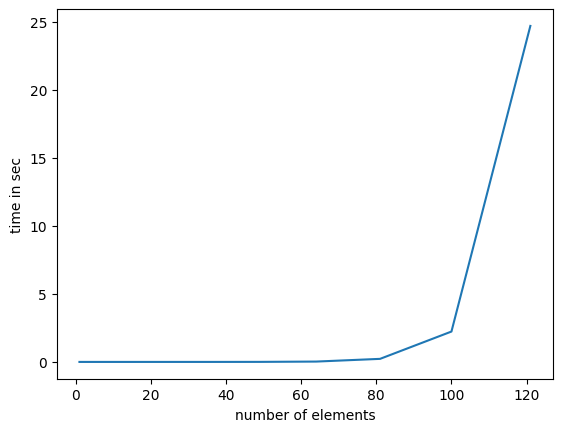

In [13]:
x = [data_det[i][0] for i in range(len(data_det))]
y = [data_det[i][1] for i in range(len(data_det))]

plt.plot(x, y)
plt.ylabel("time in sec")
plt.xlabel("number of elements")
plt.show()



    

### Simulierung Cramerisce Regel

#### Generierung von Testdaten

In [6]:
matrix = [[3,-1], [-1,3]]
loesung = [20,-20]
print(cramerische_regel(matrix, loesung))

[5.0, -5.0]


In [7]:
def gen_test_matrix_mit_loesung(size):
    data = []
    for i in range(1, size+1):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        loesung = []
        for j in range(i):
            loesung.append(randint(0, 10))
        start = timer()
        result = cramerische_regel(matrix, loesung)
        end = timer()
        time = end - start
        data.append([i*i, time])
    return data, result

In [8]:
data, result = gen_test_matrix_mit_loesung(11)
for i in range(0):
    new_data, new_result = gen_test_matrix_mit_loesung(11)
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 1
data_cra = data

#### Plotten der Daten

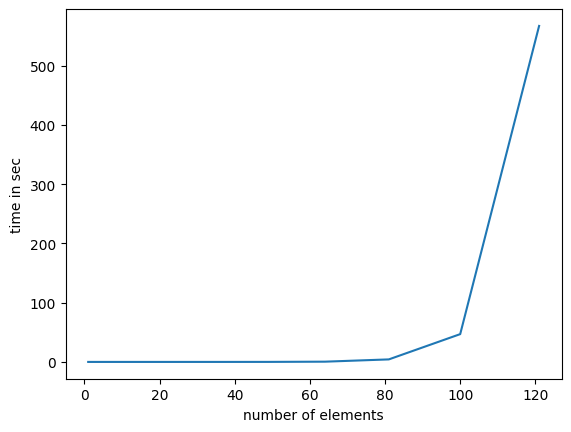

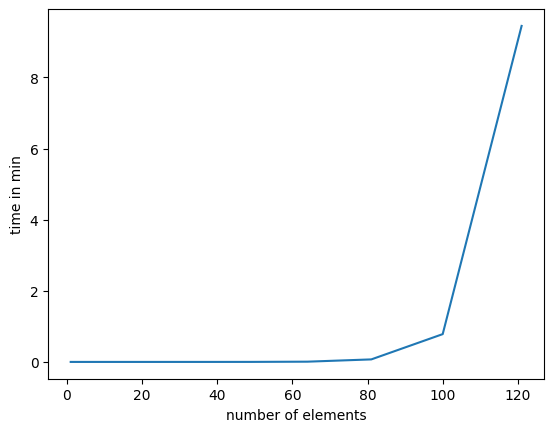

In [9]:
x_cra = [data_cra[i][0] for i in range(len(data_cra))]
y_cra = [data_cra[i][1] for i in range(len(data_cra))]
plt.plot(x_cra, y_cra)
plt.ylabel("time in sec")
plt.xlabel("number of elements")
plt.show()

y_cra = [data_cra[i][1] / 60 for i in range(len(data_cra))]
plt.plot(x_cra, y_cra)
plt.ylabel("time in min")
plt.xlabel("number of elements")
plt.show()



    

#### Vergleich zwischen Cramerisce Regel und Berechnung der Determinante

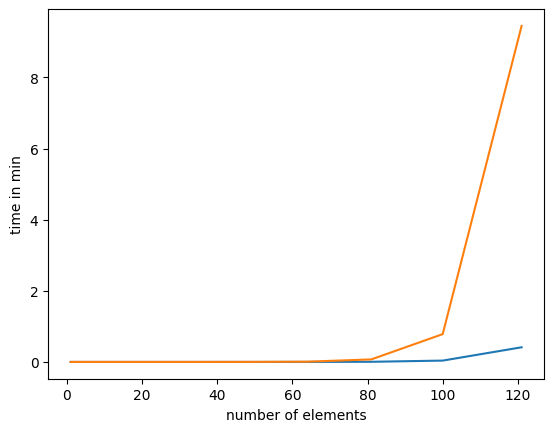

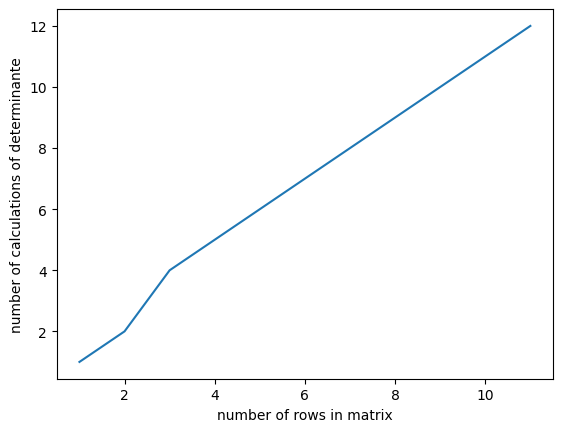

In [14]:
x_cra = [data_cra[i][0] for i in range(len(data_cra))]
y_cra = [data_cra[i][1] / 60 for i in range(len(data_cra))]
x_det = [data_det[i][0] for i in range(len(data_det))]
y_det = [data_det[i][1] / 60 for i in range(len(data_det))]
plt.plot(x_det, y_det)
plt.plot(x_cra, y_cra)
plt.ylabel("time in min")
plt.xlabel("number of elements")
plt.show()

x_count = [(math.sqrt(data_cra[i][0])) for i in range(len(data_cra))]
y_count = [(math.sqrt(data_cra[i][0])) for i in range(len(data_cra))]
for i in range(2, len(y_count)):
    y_count[i] += 1
plt.plot(x_count, y_count)
plt.ylabel("number of calculations of determinante")
plt.xlabel("number of rows in matrix")
plt.show()